In [1]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [3]:
matches = pd.read_csv("C:/Users/shree/Desktop/matches.csv")
deliveries = pd.read_csv("C:/Users/shree/Desktop/deliveries.csv")

print(matches.shape)
print(deliveries.shape)

matches.head()


(1095, 20)
(260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,04/18/2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,04/19/2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,04/19/2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,04/20/2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,04/20/2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.info()
deliveries.info()

print("\nMissing values in matches:\n", matches.isnull().sum())
print("\nMissing values in deliveries:\n", deliveries.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')
matches['season'] = matches['date'].dt.year

matches[['id', 'date', 'season']].head()


,id,date,season
0,335982,2008-04-18,2008
1,335983,2008-04-19,2008
2,335984,2008-04-19,2008
3,335985,2008-04-20,2008
4,335986,2008-04-20,2008


In [6]:
ipl = deliveries.merge(matches[['id', 'season', 'winner', 'team1', 'team2']], 
                       left_on='match_id', right_on='id', how='left')

ipl.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season,winner,team1,team2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,legbyes,0,NaN,NaN,NaN,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,wides,0,NaN,NaN,NaN,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders


In [7]:
top_scorers = ipl.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_scorers


batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

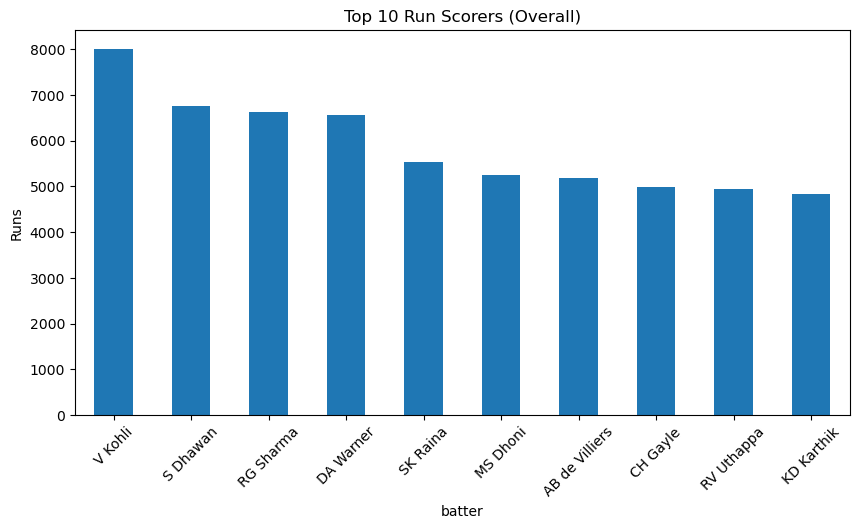

In [8]:
plt.figure(figsize=(10,5))
top_scorers.plot(kind='bar')
plt.title("Top 10 Run Scorers (Overall)")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()


In [9]:
batter_stats = ipl.groupby('batter').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

batter_stats['strike_rate'] = (batter_stats['runs'] / batter_stats['balls']) * 100
batter_stats = batter_stats[batter_stats['balls'] >= 300]   # minimum balls filter

batter_stats.sort_values('strike_rate', ascending=False).head(10)


,batter,runs,balls,strike_rate
433,PD Salt,653,385,169.610390
617,TM Head,772,458,168.558952
39,AD Russell,2488,1515,164.224422
208,H Klaasen,993,613,161.990212
612,TH David,659,417,158.033573
561,SP Narine,1534,984,155.894309
396,N Pooran,1769,1143,154.768154
323,LS Livingstone,939,609,154.187192
504,Rashid Khan,545,355,153.521127
203,GJ Maxwell,2772,1842,150.488599


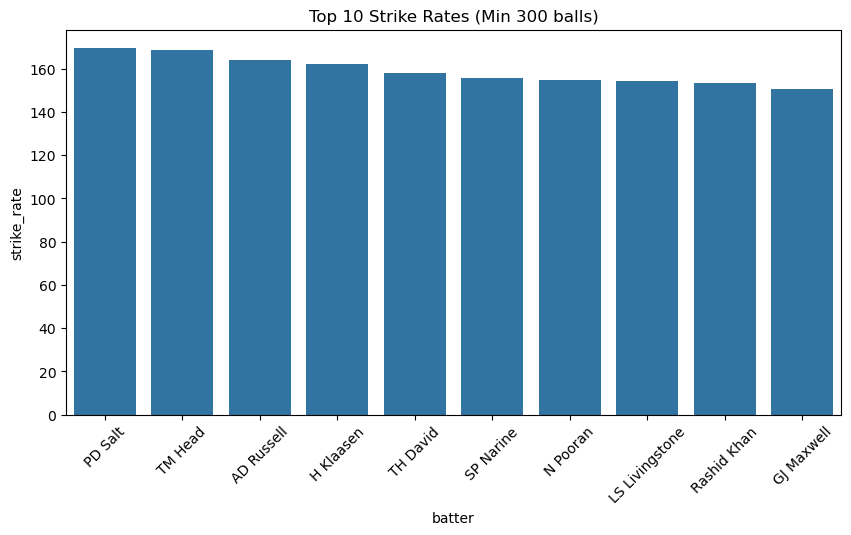

In [10]:
top_sr = batter_stats.sort_values('strike_rate', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_sr, x='batter', y='strike_rate')
plt.title("Top 10 Strike Rates (Min 300 balls)")
plt.xticks(rotation=45)
plt.show()


In [11]:
team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
team_wins = matches['winner'].value_counts()

win_rate = (team_wins / team_matches * 100).sort_values(ascending=False)
win_rate = win_rate.dropna()

win_rate.head(10)


Rising Pune Supergiant         62.500000
Gujarat Titans                 62.222222
Chennai Super Kings            57.983193
Mumbai Indians                 55.172414
Lucknow Super Giants           54.545455
Delhi Capitals                 52.747253
Kolkata Knight Riders          52.191235
Rajasthan Royals               50.678733
Sunrisers Hyderabad            48.351648
Royal Challengers Bangalore    48.333333
Name: count, dtype: float64

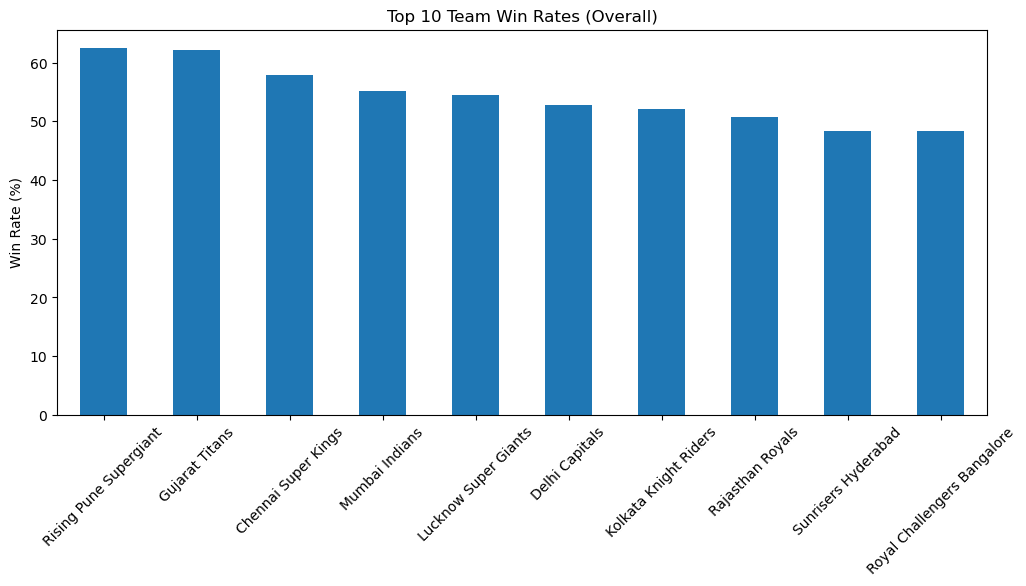

In [12]:
plt.figure(figsize=(12,5))
win_rate.head(10).plot(kind='bar')
plt.title("Top 10 Team Win Rates (Overall)")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.show()


In [13]:
season_team_wins = matches.groupby(['season', 'winner']).size().reset_index(name='wins')
season_team_wins = season_team_wins.sort_values(['season', 'wins'], ascending=[True, False])

season_team_wins.head(10)


,season,winner,wins
6,2008,Rajasthan Royals,13
3,2008,Kings XI Punjab,10
0,2008,Chennai Super Kings,9
2,2008,Delhi Daredevils,7
5,2008,Mumbai Indians,7
4,2008,Kolkata Knight Riders,6
7,2008,Royal Challengers Bangalore,4
1,2008,Deccan Chargers,2
10,2009,Delhi Daredevils,10
9,2009,Deccan Chargers,9


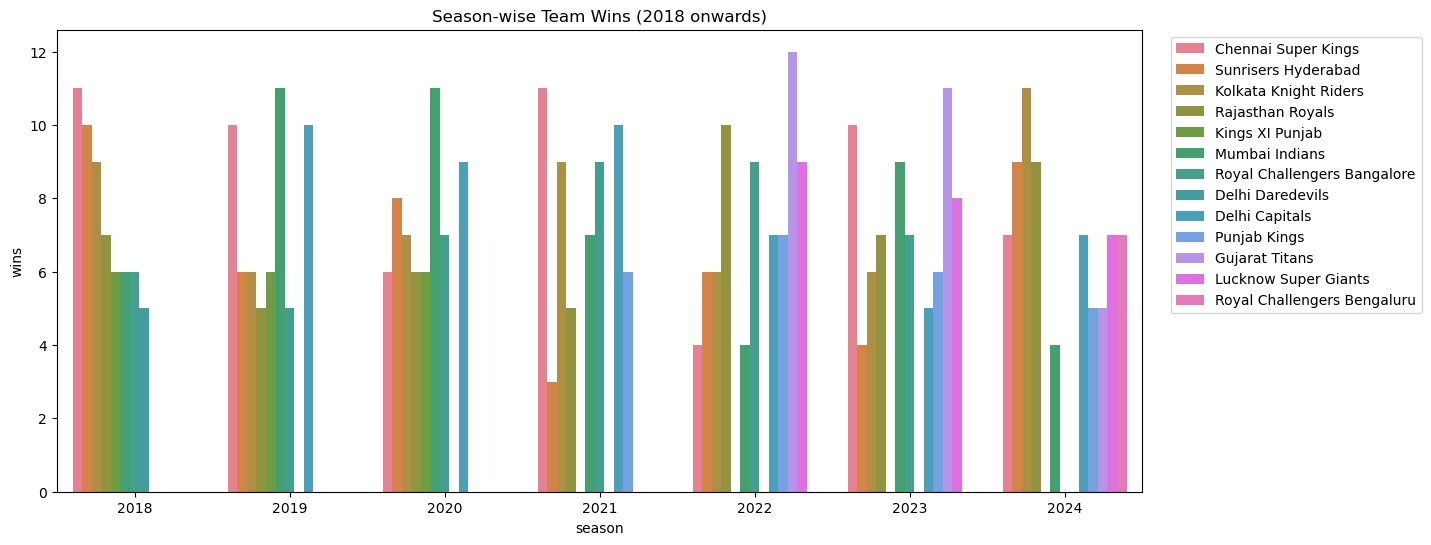

In [14]:
filtered = season_team_wins[season_team_wins['season'] >= 2018]

plt.figure(figsize=(14,6))
sns.barplot(data=filtered, x='season', y='wins', hue='winner')
plt.title("Season-wise Team Wins (2018 onwards)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [15]:
season_runs = ipl.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
season_top = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False])

season_top.groupby('season').head(1).head(10)


,season,batter,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


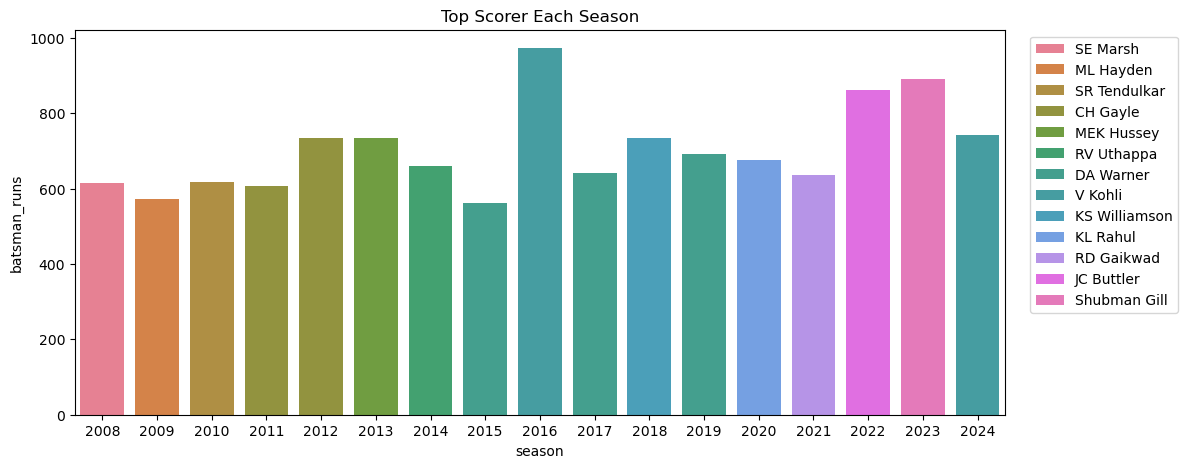

In [16]:
top_each_season = season_top.groupby('season').head(1)

plt.figure(figsize=(12,5))
sns.barplot(data=top_each_season, x='season', y='batsman_runs', hue='batter')
plt.title("Top Scorer Each Season")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


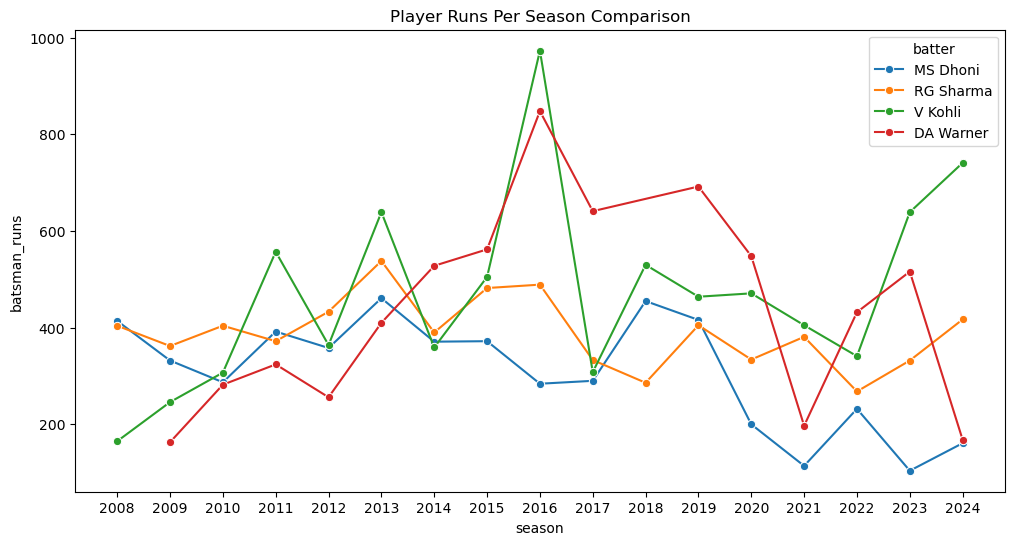

In [17]:
players = ['V Kohli', 'RG Sharma', 'DA Warner', 'MS Dhoni']

player_season_runs = ipl[ipl['batter'].isin(players)].groupby(['season','batter'])['batsman_runs'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=player_season_runs, x='season', y='batsman_runs', hue='batter', marker='o')
plt.title("Player Runs Per Season Comparison")
plt.xticks(sorted(player_season_runs['season'].unique()))
plt.show()


In [18]:
if 'is_wicket' in ipl.columns:
    top_wicket_takers = ipl.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
    top_wicket_takers


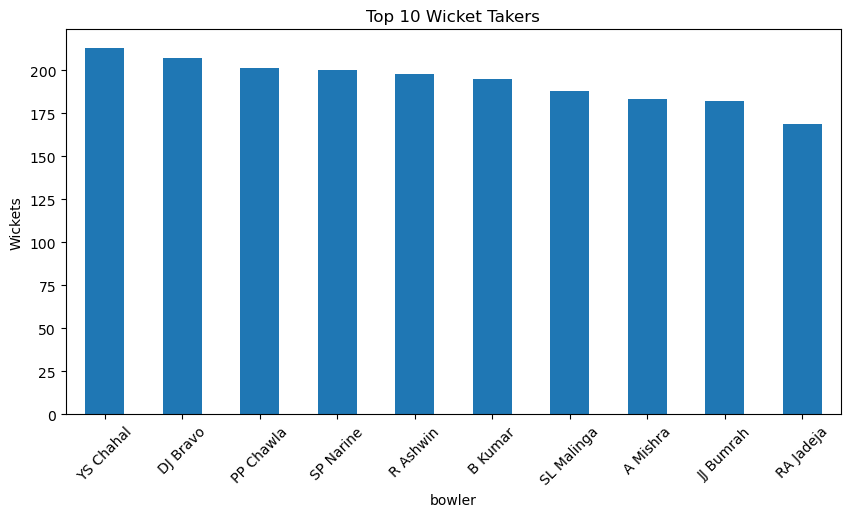

In [19]:
if 'is_wicket' in ipl.columns:
    plt.figure(figsize=(10,5))
    top_wicket_takers.plot(kind='bar')
    plt.title("Top 10 Wicket Takers")
    plt.ylabel("Wickets")
    plt.xticks(rotation=45)
    plt.show()


In [20]:
os.makedirs("outputs/plots", exist_ok=True)


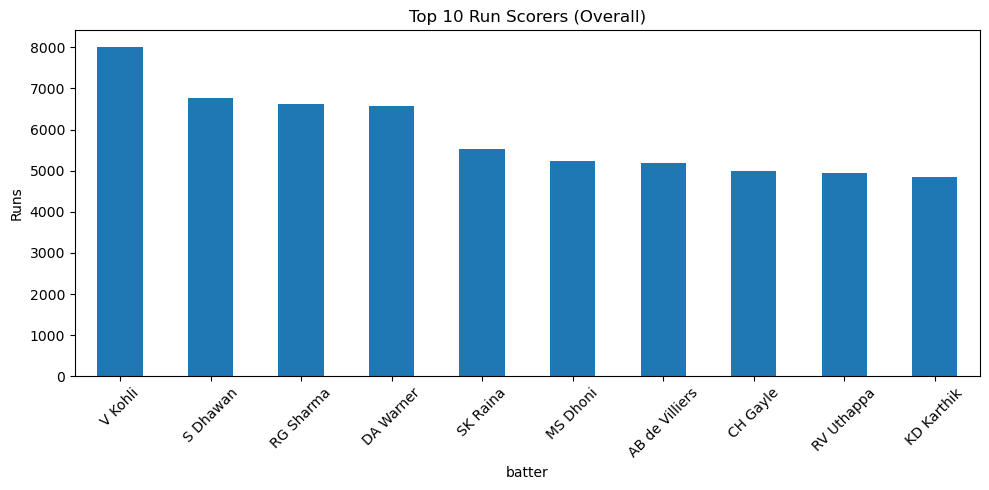

In [21]:
plt.figure(figsize=(10,5))
top_scorers.plot(kind='bar')
plt.title("Top 10 Run Scorers (Overall)")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/plots/top_10_scorers.png")
plt.show()


In [22]:
summary = batter_stats.sort_values('runs', ascending=False).head(20)
summary.to_csv("outputs/summary_top_batters.csv", index=False)

print("Saved: outputs/summary_top_batters.csv")


Saved: outputs/summary_top_batters.csv


In [ ]:
ssssssssssssss